#                                EDA ON USED CAR SALES

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
  8.1  [**Which body type cars has highest sales?**](#Section81)<br>
  8.2  [**Top 10 Car sales by its brand??**](#Section82)<br>
  8.3  [**Top 10 Car sales by Model?**](#Section83)<br>
  8.4  [**Which type of Car body has highest Mileage?**](#Section84)<br>
  8.5  [**Which Car body type has highest Price?**](#Section85)<br>
  8.6  [**Which Engine and Body type gives highest Mileage ?**](#Section86)<br>
  8.7  [**Which Body type and Engine type has highest sales ?**](#Section87)<br>
  8.8  [**Which Body and Wheel Type has best price ?**](#Section88)<br>
  8.9  [**Which Wheel and Engine Type has best price ?**](#Section89)<br>
  8.10 [**Registration of cars by its fuel type?**](#Section810)<br>
  8.11 [**Registration of cars as per years?**](#Section811)<br>
  8.12 [**Pair plot to find Correlation?**](#Section812)<br>
  8.13 [**Correlation using Heat map**](#Section813)<br>  
9. [**Summarization**](#Section9)</br>
  9.1  [**Conclusion**](#Section91)</br>
  9.2  [**Actionable Insights**](#Section91)</br>

---

#   
<a name = Section1></a>
# **1. Introduction**
---


   Used cars are in high demand in today’s economy because of the lower prices, slightly   higher gas mileage, and that they can be more trustworthy against some of the newer models.
One of the very first things a buyer should consider when looking for a car is what kind of car he/she wants. Many different factors can affect the car buying process. For one, the buyer must consider how big of a vehicle he/she wants and safety features like airbags, seatbelts, and working brakes.

   Our analysis basically focuses on the process of sales in used cars. The car sales depend on multiple factors like Brand name, Model, Year of Purchase, Fuel type, Body type, Mileage, Engine type and Price.
    
   I'm going to use **EDA**:
     
   -To identify  **key factors** influencing the car sales.
   
   -To help car manufacturers **understand** the **consumer behaviour** and **purchase pattern**.
   
   -To help car manufacturers in  **devising right strategy** for **new product development** and **launches**.
   
   -To help the car manufacturers to **grow sales** and **gain market share**.
   

---
<a name = Section2></a>
# **2. Problem Statement**
---

<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>

- To find the **pattern** in the sales car.

- To determine the **relationship** in data.

- To identify the important factors that attributes to **car sales**.

- To identify the **customer preferences** and their **purchase behavior** over a period of time.


---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---


### **Installing Libraries**

In [1]:
!pip install -q datascience                                        
!pip install -q pandas-profiling   

### **Upgrading Libraries**

In [2]:
!pip install -q --upgrade pandas-profiling 

### **Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go
#%matplotlib.pyplot.boxplot

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

#### Importing the Dataset

In [55]:
df = pd.read_csv('car_sales.csv')
print('Data Shape:', df.shape)

Data Shape: (9576, 10)


**Observations**

- The dataset comprises of __9576 Rows_and_10 Columns__. Below is a table showing names of all the columns and their description.


|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vechile is registered|
|10| price         | Price of Car in $|

### **Data Description**

In [56]:
df.describe(include ='all')                        

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


### **Data Information**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


**Observations:**

 - There are a total of **9576 samples (rows)** and **10 columns** in the dataframe.
  
 - There are **4 columns** with a **numeric** datatype and **6 columns** with an **object** datatype.
  
 - There are **434 missing** values in **engV** and **511 missing** values in **drive** data.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

In [58]:
df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [59]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [60]:
profile= df.profile_report(title= "Used car_sales analysis before Pre-Profiling", progress_bar=False ,minimal = True)
profile.to_file(output_file="Used car_sales analysis_pre_profiling.html")

**Observations from Pandas Profiling before Data Processing**
__Dataset info__:
- Number of variables: 10
- Number of observations: 9576
- Missing cells: 1.0%
- Duplicate rows : 1.2% 

__Variables types__: 
- Numeric = 4
- Categorical = 5
- Boolean = 1

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

  - Handling missing data,

  - Handling redundant data,

  - Handling outliers,
  
  - Handling inconsistent data.

__Handling missing data:__

In [61]:
df.isnull().sum()                          #To find the missing values in each column 

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

Here we can see that **engV** and **drive** column has missing variables. We will see how to deal with them. 

In [62]:
df['engV'].head()               # Shows the top datas in the data frame of that variable with its dtype.

0    2.5
1    1.8
2    5.5
3    1.8
4    NaN
Name: engV, dtype: float64

In [63]:
df['engV'].sum()            # Give the sum of values for this axis

24192.879999999997

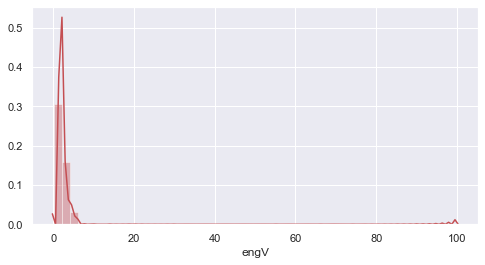

In [64]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = df['engV']
ax = sns.distplot(x , color = 'r')


 - Engine Version is a univarible numerical. 
 - Since engV has many missing entries, we will fill those with median.

In [65]:
df['engV'].fillna(df['engV'].median(), inplace=True)


In [66]:
df.engV.sum()

25060.879999999997

In [67]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

  - Now the missing data in engV is replaced.

In [68]:
df['drive'].mode()                # This tells the maximum occured categorical value

0    front
dtype: object

  - Drive is a categorical column with missing entries.
  - Front is the most occured categorical entry .
  

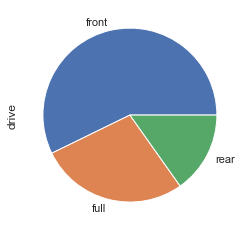

In [18]:
df['drive'].value_counts().plot(kind='pie')  
plt.show()       # pie chart gives us the visual representaion of it.

In [69]:
p = df.drive.value_counts(normalize=True)    # Series of probabilities
m = df.drive.isnull()

np.random.seed(9576)
rand_fill = np.random.choice(p.index, size=m.sum(), p=p)
#array(['front', 'rear', 'full'], dtype=object)

df.loc[m, 'drive'] = rand_fill

df['drive'].head()

0     full
1     rear
2     rear
3    front
4    front
Name: drive, dtype: object

Text(0.5, 1.0, 'Drive')

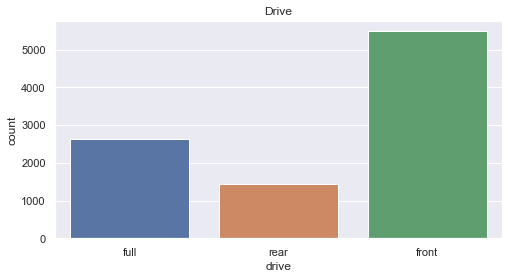

In [20]:
sns.countplot(x='drive', data=df).set_title('Drive')

  - Normalizing the drive column with value counts.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9576 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


   - Here all the misiing column is handled.

__Handling Redundant data__ 

In [71]:
duplicate_df = df.duplicated()                     #Copying the data into a new dataframe 
print(duplicate_df.sum())                          #Gives the sum of duplicate entries
df[duplicate_df]

112


,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


**Observation :**
   Since many rows are dulpicated , we shall drop the redundant entries.

In [72]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9464 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9464 non-null   object 
 1   price         9464 non-null   float64
 2   body          9464 non-null   object 
 3   mileage       9464 non-null   int64  
 4   engV          9464 non-null   float64
 5   engType       9464 non-null   object 
 6   registration  9464 non-null   object 
 7   year          9464 non-null   int64  
 8   model         9464 non-null   object 
 9   drive         9464 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.3+ KB


In [73]:
new_df=df.duplicated()         # Checking for dulpicate data enties after dropping   
new_df.sum()

0

__Handling Outliers__

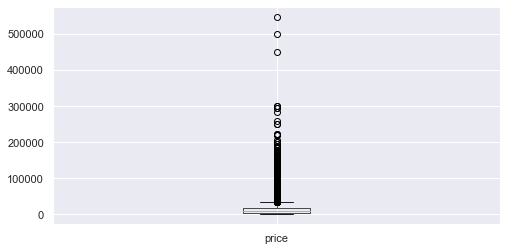

In [74]:
df.boxplot(column= ['price'])                        
plt.show()

 - Price column has many outliers.

In [75]:
 df.isnull().values.any() #missing values
df.isnull().sum().sum()  #sum of missing values
mean_price = df['price'].mean(skipna=True)
print (mean_price)
df=df.replace(0,mean_price) 
print (df)

15304.016983479507
                car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0

In [76]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5* IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [77]:
lowprice,uppprice=remove_outliers(df['price'])
df['price']=np.where(df['price']>uppprice,uppprice,df['price'])
df['price']=np.where(df['price']<lowprice,lowprice,df['price'])

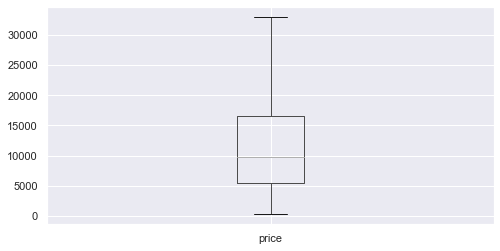

In [78]:
df.boxplot(column= ['price'])
plt.show()

   Outlier in __Price__ column is handled. 

__Handling inconsisent data__

In [79]:
df.mileage.describe()
df.isnull().values.any() #missing values
df.isnull().sum().sum()  #sum of missing values
#mean_mileage = df['mileage'].mean(skipna=True)
#print (mean_mileage)
#df=df.replace(0,mean_mileage) 
median_mileage = df['mileage'].median(skipna=True)
print (median_mileage)
df=df.replace(0,median_mileage) 

print (df)


136.0
                car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover     68.0   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan    173.0   1.8     Gas          yes   
2     Mercedes-Benz  33000.0      other    135.0   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van    162.0   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon     91.0   2.0   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover    140.0   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon    150.0   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover    180.0   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan    150.0   3.5     Gas          yes   
9575           Audi  22500.0      other     71.0   3.6  Petrol          yes   

      year      model  drive  
0     2010    

In [80]:
duplicate_df = df.duplicated()                     #Copying the data into a new dataframe 

print(duplicate_df.sum())                          #Gives the sum of duplicate entries
df[duplicate_df]

77


,car,price,body,mileage,engV,engType,registration,year,model,drive
46,Mercedes-Benz,33000.0,crossover,15304.016983,2.2,Diesel,yes,2016,GLE-Class,full
47,BMW,33000.0,crossover,1.000000,2.0,Diesel,yes,2016,X5,full
72,Toyota,33000.0,crossover,15304.016983,4.5,Diesel,yes,2016,Land Cruiser 200,full
75,Toyota,33000.0,crossover,15304.016983,4.5,Diesel,yes,2016,Land Cruiser 200,full
87,Toyota,33000.0,crossover,15304.016983,4.5,Diesel,yes,2016,Land Cruiser 200,full
...,...,...,...,...,...,...,...,...,...,...
8829,Honda,33000.0,crossover,15304.016983,1.6,Diesel,yes,2016,CR-V,full
8920,BMW,33000.0,sedan,5.000000,2.0,Petrol,yes,2016,520,rear
9268,Subaru,33000.0,crossover,15304.016983,2.0,Diesel,yes,2016,Forester,full
9322,Toyota,33000.0,crossover,90.000000,4.5,Diesel,yes,2012,Land Cruiser 200,full


In [81]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9387 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9387 non-null   object 
 1   price         9387 non-null   float64
 2   body          9387 non-null   object 
 3   mileage       9387 non-null   float64
 4   engV          9387 non-null   float64
 5   engType       9387 non-null   object 
 6   registration  9387 non-null   object 
 7   year          9387 non-null   int64  
 8   model         9387 non-null   object 
 9   drive         9387 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 806.7+ KB


In [82]:
df.reset_index(drop=True)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,33000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.0,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9382,Hyundai,14500.0,crossover,140.0,2.0,Gas,yes,2011,Tucson,front
9383,Volkswagen,2200.0,vagon,150.0,1.6,Petrol,yes,1986,Passat B2,front
9384,Mercedes-Benz,18500.0,crossover,180.0,3.5,Petrol,yes,2008,ML 350,full
9385,Lexus,16999.0,sedan,150.0,3.5,Gas,yes,2008,ES 350,front


In [83]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9387 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9387 non-null   object 
 1   price         9387 non-null   float64
 2   body          9387 non-null   object 
 3   mileage       9387 non-null   float64
 4   engV          9387 non-null   float64
 5   engType       9387 non-null   object 
 6   registration  9387 non-null   object 
 7   year          9387 non-null   int64  
 8   model         9387 non-null   object 
 9   drive         9387 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 806.7+ KB


In [84]:
df_data = df.copy(deep=True) 
df_data.head
def preprocess(df):
    # Treat index as any other column
    if (
        not pd.Index(np.arange(0, len(df))).equals(df.index)
        or df.index.dtype != np.int64
    ):
        df = df.reset_index()

    # Rename reserved column names
    df = rename_index(df)

    # Ensure that columns are strings
    df.columns = df.columns.astype("str")
    return df

df.set_index('car', inplace=True)
df.shape

(9387, 9)

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

In [85]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile= df.profile_report(title= "Used car_sales analysis after Post-Profiling", progress_bar=False ,minimal = True,pool_size=1)
profile.to_file(output_file="Used car_sales analysis_post_profiling.html")

**Observations from Pandas Profiling after Data Processing**
__Dataset info__:
- Number of variables: 10
- Number of observations: 9387
- Missing cells: 0
- Duplicate rows : 0

__Variables types__: 
- Numeric = 4
- Categorical = 5
- Boolean = 1


- All the missing cells are replaced. Duplicated rows are dropped.

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

In [86]:
df_data.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9387 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9387 non-null   object 
 1   price         9387 non-null   float64
 2   body          9387 non-null   object 
 3   mileage       9387 non-null   float64
 4   engV          9387 non-null   float64
 5   engType       9387 non-null   object 
 6   registration  9387 non-null   object 
 7   year          9387 non-null   int64  
 8   model         9387 non-null   object 
 9   drive         9387 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 806.7+ KB


In [87]:
df_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,33000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.0,Other,yes,2013,E-Class,front


<a name = Section81></a>
### 8.1 Which body type car has highest sales?

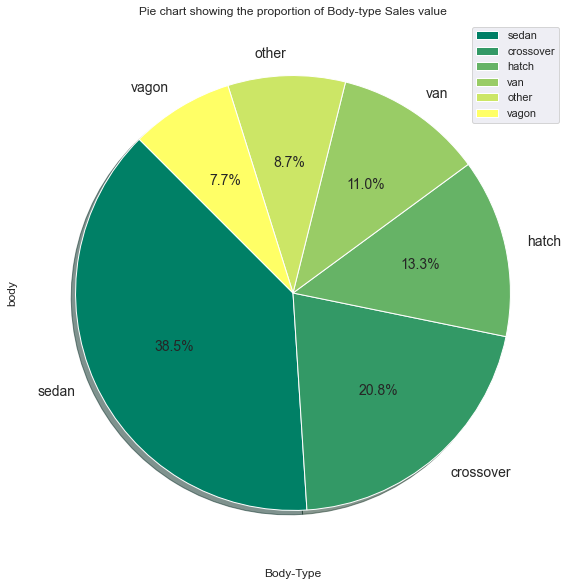

In [88]:
fig = plt.figure(figsize =(10, 7)) 
df['body'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%',figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.xlabel('Body-Type')
plt.title('Pie chart showing the proportion of Body-type Sales value')
plt.show()


**Observation:**

  Sedan Type cars has the highest sales followed by Crossover.

<a name = Section82></a>
### 8.2 Top 10 Car sales by its brand?

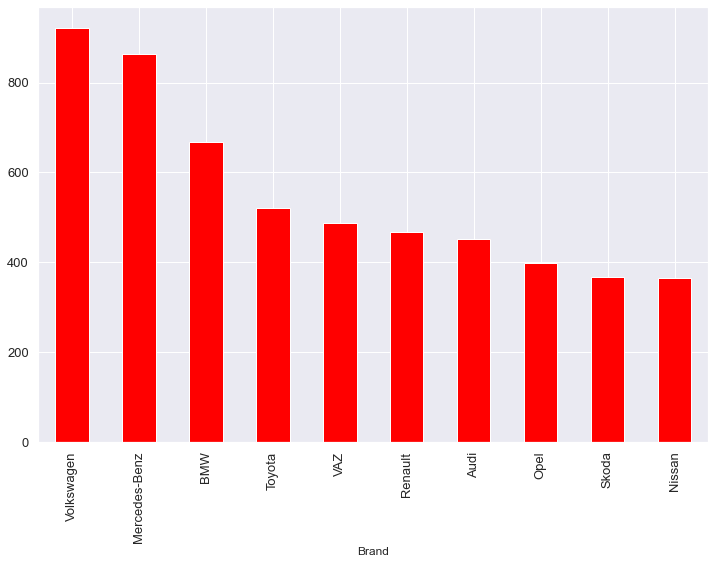

In [89]:
df_data.groupby(["car","price", "body","mileage", "engV","engType","registration","year","model","drive"]).count()

df_data['car'].value_counts()[:10].plot(kind='bar', figsize=(12,8), fontsize=13, color='red')
plt.xlabel('Brand')
plt.show()

 - Volkswagen, Mercedes-Benz and BMW are the top three car brands preferred by the customers. 

<a name = Section83></a>
### 8.3 Top 10 Car sales by Model?

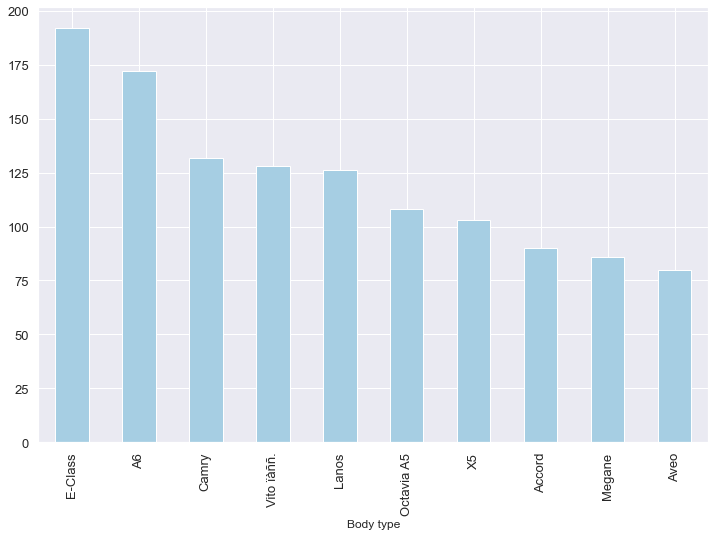

In [90]:
df['model'].value_counts()[:10].plot(kind='bar', figsize=(12,8), fontsize=13, colormap='Paired')
plt.xlabel('Body type')
plt.show()

 - E-class (Merc), A6 (Audi) and Camry (Toyota) are the top three selling models (all sedan) being preferred by customers.

<a name = Section84></a>
### 8.4 Which type of Car body has highest Mileage?

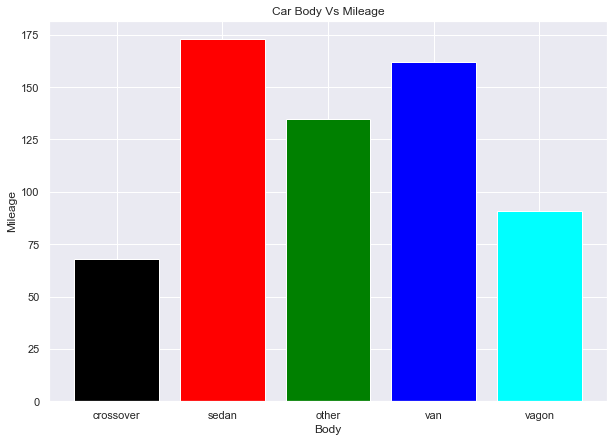

In [96]:
body= df['body'].head()
mileage= df['mileage'].head()
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.bar(body, mileage, color=['black', 'red', 'green', 'blue', 'cyan']) 
# Add title and axis names
plt.title('Car Body Vs Mileage')
plt.xlabel('Body')
plt.ylabel('Mileage')
  
# Show Plot 
plt.show() 


  - Best mileage is being offered by Sedan.
  - Vagon, Crossover has lower mileage but still are in top choices.
  - We can infer mileage has not impact on customer choice in buying decision.

<a name = Section85></a>
### 8.5 Which Car body type has highest Price?

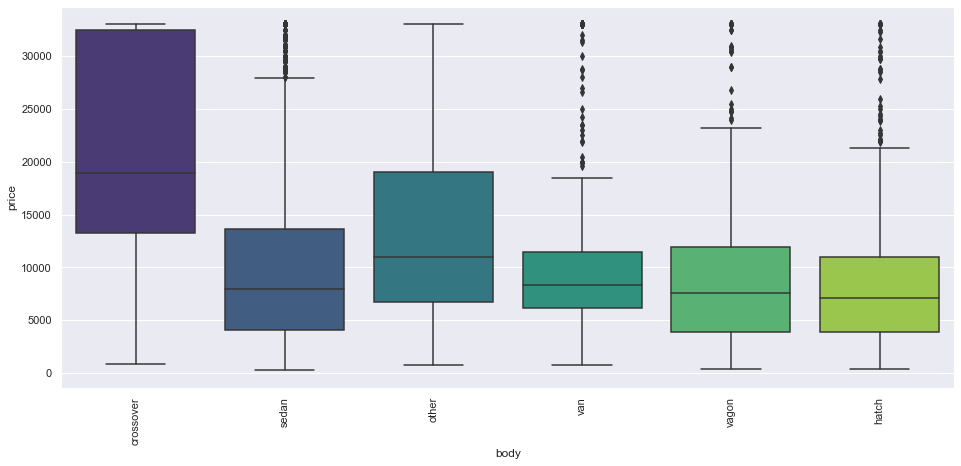

In [44]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='body', y='price', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.show()

- Lets see the visualization with violinplot. 

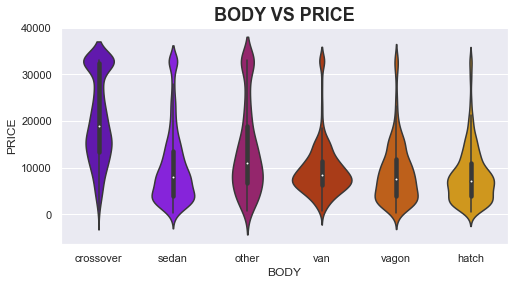

In [45]:
ax=sns.violinplot(x="body",y="price",palette="gnuplot", data=df)
plt.xlabel("BODY")
plt.ylabel("PRICE")
plt.title("BODY VS PRICE", fontsize=18, fontweight="bold")
plt.show()

  - Crossover body price are twice expensive of Sedan.
  - Pricing play an important role in sales along with other attributes.
  - Popularity of Sedan over years can be attributed to competitive pricing with other body types
  

<a name = Section86></a>
### 8.6 Which Engine and Body type gives highest Mileage ?  

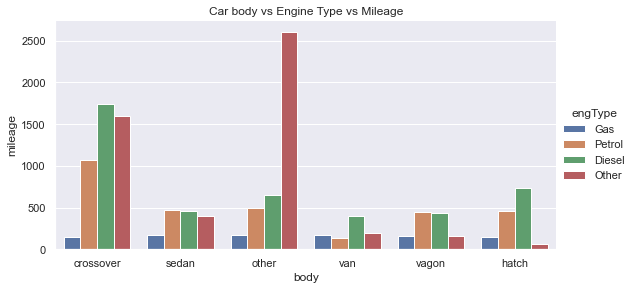

In [100]:
sns.factorplot(x ='body', y ='mileage',  hue = 'engType', kind='bar',data = df,size=4,aspect=2, ci=None) 
plt.title("Car body vs Engine Type vs Mileage") 
plt.show()

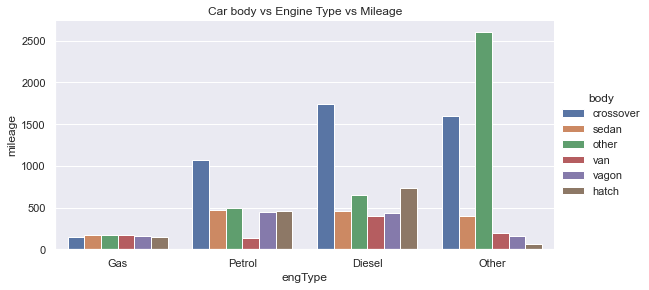

In [47]:
sns.factorplot(x ='engType', y ='mileage',  hue = 'body', kind='bar',data = df,size=4,aspect=2, ci=None) 
plt.title("Car body vs Engine Type vs Mileage") 
plt.show()

- Diesel engine has showing a high mileage with respect to all body types.

<a name = Section87></a>
### 8.7 Which Body type and Engine type has highest sales ?  

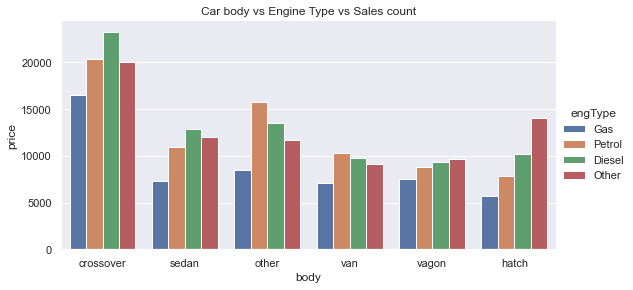

In [48]:
#sns.factorplot('body', data=df, hue='engType', kind='count',size=4,aspect=2)
sns.factorplot(x ='body', y ='price',  hue = 'engType', kind='bar',data = df,size=4,aspect=2,ci=None) 
plt.title("Car body vs Engine Type vs Sales count") 
plt.show()

- Diesel is the preferred fuel in sales due to its mileage.
- Diesel is preferred for bigger vehicles where torque requirement is more like van, vagon and even crossover

In [49]:

xy = pd.crosstab(df.body,df.engType)


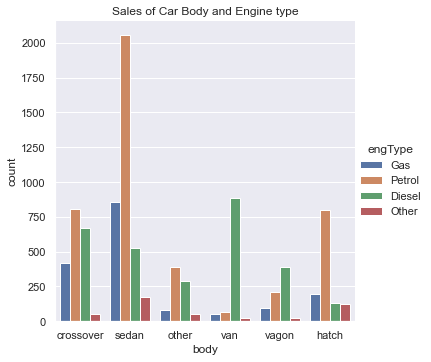

In [50]:
df.mileage.describe()
df.groupby(["car","price", "body","mileage", "engV","engType","registration","year","model","drive"]).count()
df['mileage']. round(0). astype(int)
df.groupby('body').apply(lambda x: ','.join(x.engType))
df.groupby('mileage').apply(lambda x: ','.join(x.body))

#df['mileage'].value_counts()[:2].plot(kind='bar', figsize=(12,8), fontsize=13, color='green')
sns.factorplot('body', data=df, hue='engType', kind='count')
plt.title('Sales of Car Body and Engine type')
plt.show()

<a name = Section88></a>
### 8.8 Which Body and Wheel Type has best price ?  

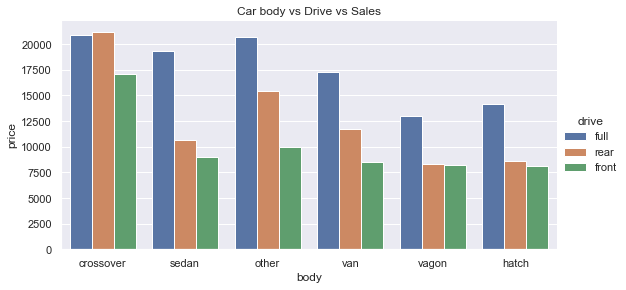

In [51]:
sns.factorplot(x ='body', y ='price',  hue = 'drive', kind='bar',data = df,size=4,aspect=2,ci=None) 
plt.title("Car body vs Drive vs Sales")
plt.show()

 - Full wheel drive is the most preferred technology across body type except crossover.
 - Full wheel drive is preferred for city driving.
 - Rear Wheel Drive is preferred when it comes to crossover cars.
 - Customers are looking for performance over driving pleasure along with safety. As Full wheel Drive you can accelerate better, with less or even no tire slippage. 

<a name = Section89></a>
### 8.9 Which Wheel and Engine Type has best price ?  

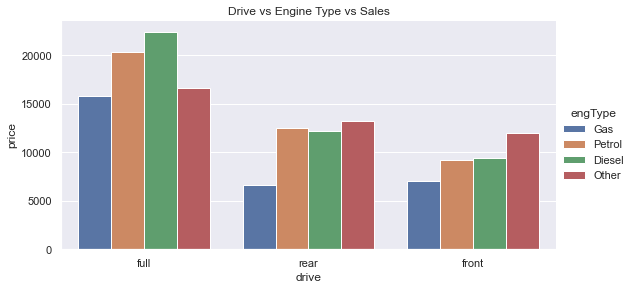

In [53]:
sns.factorplot(x ='drive', y ='price',  hue = 'engType', kind='bar',data = df,size=4,aspect=2,ci=None) 
plt.title("Drive vs Engine Type vs Sales")
plt.show()

 - Similar trend in the choice of fuel across various drive options.
 - Diesel is most preferred followed Petrol across drive.

<a name = Section810></a>
### 8.10 Registration of cars by its fuel type?

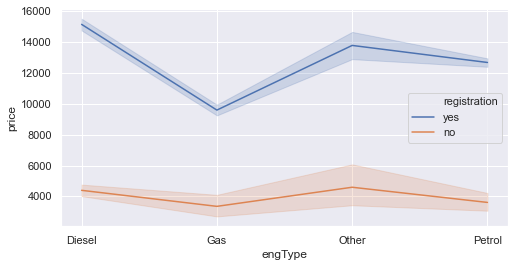

In [56]:
sns.lineplot(data=df, x="engType", y="price" , hue="registration")
plt.show()

 - Registration as a percentage of sales is mostly seen in diesel cars.

<a name = Section811></a>
### 8.11 Registration of cars as per years?

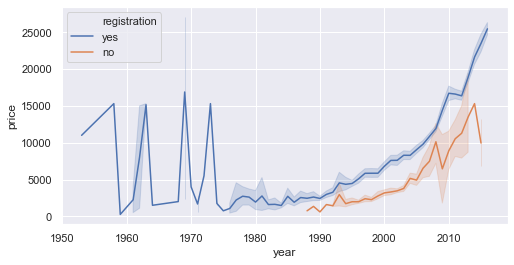

In [57]:
sns.lineplot(data=df, x="year", y="price" , hue="registration")
plt.show()

 - 1993-2008 is the period we can see steep rise in the non-registration of cars vis a vis sales.
 - 2008 onwards the trend of non-registration has declined.
 - In the last three years there has been no reported case of non-registration of new cars purchased.

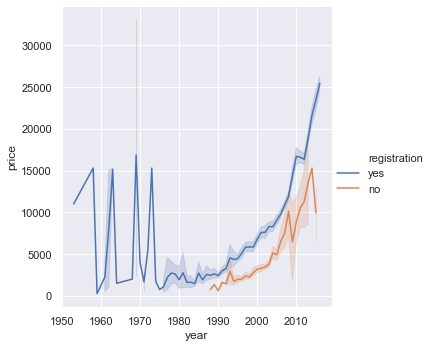

In [58]:
sns.relplot(data=df, x="year", y="price", hue="registration",kind="line")
plt.show()

__Lets also see the count of registration per year.__

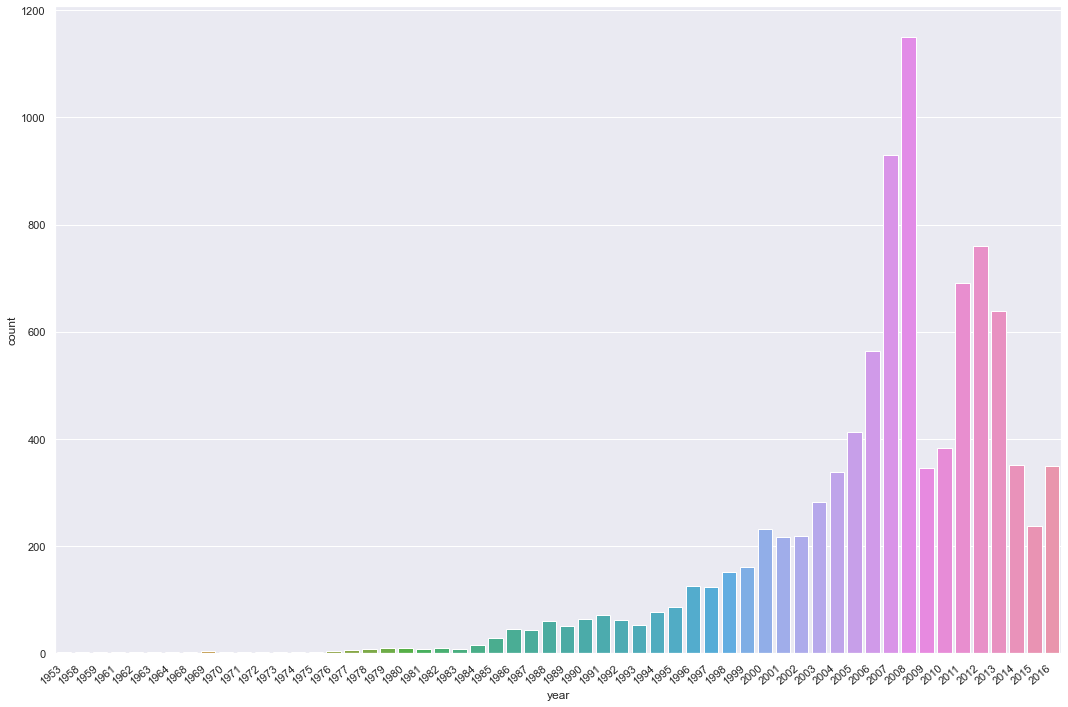

In [59]:
#sns.countplot(x='year', data=df).set_title('Sales by year')
#.plot(kind='barh', figsize=(12,8), fontsize=13, color='red'
plt.figure(figsize=(15,10))
ax = sns.countplot(x="year", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<a name = Section812></a>
### 8.12 Pair plot to find Correlation?

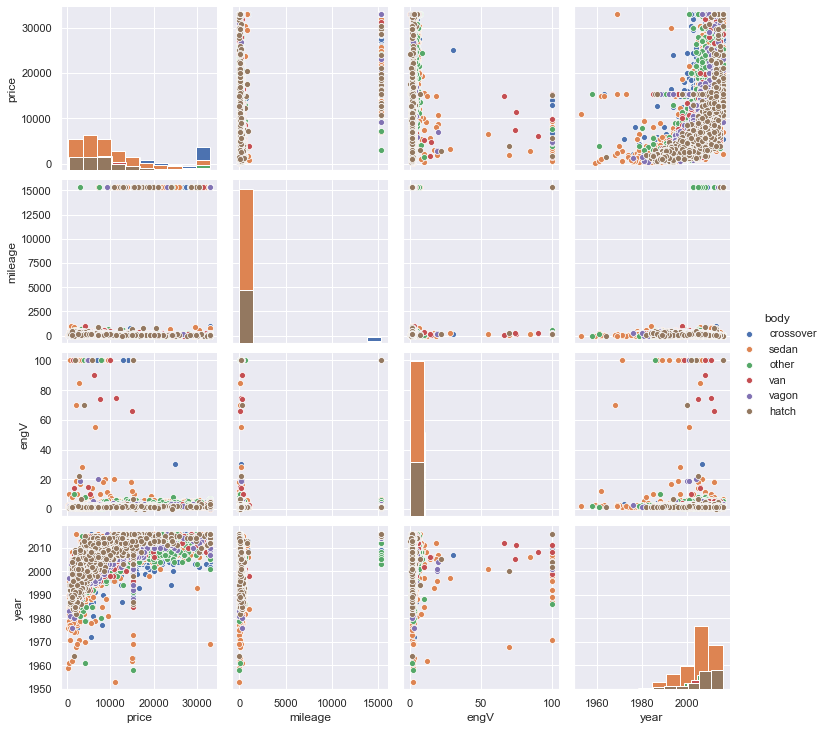

In [60]:
sns.pairplot(df ,  hue="body",diag_kind="hist")
plt.show()

 - No strong positive or negative correlation between the variables.
 - Year and price showing some moderate positive correlation.
 - Year and Engine showing some signs of moderate negative correlation.
 - Price and Mileage showing some moderate positive correlation.
 

#### Create a copy of "df_data" dataframe for Label encoding

In [61]:
df1_data = df.copy(deep=True)   
df1_data.head()

from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in df1_data.columns:                                                          # In order to find the correlation between variables, we do Label encoding 
    df1_data[i] = number.fit_transform(df_data[i].astype('str'))
    


<a name = Section813></a>
### 8.13 Correlation using Heat map

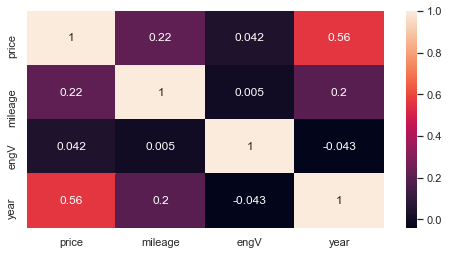

In [62]:
sns.heatmap(df.corr(),annot = True)
plt.show()

 - Year and Price have moderate positive correlation, R = 0.56, which means with every passing year there has been an moderate increase in the car prices.
 - Year and mileage have moderate positive correlation, R =0.2 , which means there has been some impact of the mileage factor on the car sales.
 - Year and Engine have moderate negative correlation, R = -0.043, which means the Engine does impact the price of the car.
 - Price and mileage has moderate postivie correaltion , R = 0.22 , which means the mileage has some impact in Price of the car.
 - All other variables have very week correlation with each other.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Sedan is most preferred car followed by crossover and hatch.

- Best mileage is being offered by Crossover.

- Sedan has been popular over years due to its competitive pricing with other body
types.

- Crossovers are twice as expensive as Sedans, but the sales is catching up with Sedan.

- Customers prefer all the fuel types across body type.

- Diesel is the most preferred fuel type followed by petrol and gas.

- Diesel cars are more preferred irrespective of moderate mileage compared to petrol and gas cars.

- Full Wheel Drive is most preferred technology across body type, except crossover .

- Non-Registration of cars is a passed. Customers are now registering their new cars.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Trend of Crossover has caught up as a promising segment for manufacturers.

- Car manufacturers should focus to launch more crossover models apart from Sedan line-up.

- Crossovers need to be competitively priced for higher sales growth and bigger market share than Sedan due to its mileage.

- Price sensitive Sedan customers will switch to Crossover with affordable options.

- Current generation Customers are looking for performance and safety capabilities.

- Manufacturers have to offer cars models with all the fuel options specially with petrol, diesel and gas.

- Mileage is an important criteria for customers when it comes to car buying. So manufacturers focus should be more on performance and features.

Additionally, before performing further analysis it would be prudent to collect more data on
variables like customer location (rural, urban, semi-urban), usage (daily, weekends), passenger
(solo, family), driven by (self, driver), age, gender, registration (private vs commercial), car specification and features, etc to have better customer insights.